In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
matplotlib.rc("font", family = "NanumBarunGothic")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
plan_new = pd.read_csv("/home/pirl/Downloads/merged_final.csv", engine = "python", encoding = "euc-kr")
plan_new.describe()

,quantity
count,49645.000000
mean,107.831157
std,100.125449
min,10.900000
25%,59.300000
50%,74.200000
75%,91.200000
max,585.900000


In [5]:
plan_be = pd.read_csv("/home/pirl/Downloads/purify/merged_new.csv", engine = "python", encoding = "euc-kr")
plan_be.describe()

,seq,customerID,quantity,maxDay,overDue,gift,Termination
count,49426.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000,49754.000000
mean,25007.240137,828630.053282,107.813531,3.489689,0.065442,0.257567,0.041846
std,14438.441437,99356.939330,100.093459,2.051559,0.482336,0.437299,0.200239
min,1.000000,656376.000000,10.900000,0.000000,0.000000,0.000000,0.000000
25%,12501.250000,742635.500000,59.300000,2.000000,0.000000,0.000000,0.000000
50%,25017.500000,828788.500000,74.200000,4.000000,0.000000,0.000000,0.000000
75%,37518.750000,915215.750000,91.200000,5.000000,0.000000,1.000000,0.000000
max,50000.000000,999998.000000,585.900000,9.000000,12.000000,1.000000,1.000000


In [6]:
plan_new

,gender,customerType,age,marital,residence,channel,credit,payment,paymentCO,quantity,province,provinceIS,cityGrade,channelType,contractExtended,contractType,contractType_1,contractType_2,cityGradeIS,Termination_str,maxDay_str,maxGift_str,Termination_rate,gender_age,overDue_str
0,FEMALE,PERSONAL,50대,SINGLE,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,경기도,경상도,2급지,연장,연장,MMQ,M,M,2급지,중도 해약 X,목요일,지급 X,A,FEMALE_50대,0일
1,FEMALE,PERSONAL,20대,MARRIED,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,서울시,충청도,1급지,연장,연장,EIQ,E,I,1급지,중도 해약 X,토요일,지급 O,A,FEMALE_20대,0일
2,FEMALE,PERSONAL,30대,MARRIED,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,충청도,서울시,1급지,총판,신규,HIQ,H,I,1급지,중도 해약 X,화요일,지급 O,B,FEMALE_30대,0일
3,MALE,PERSONAL,20대,MARRIED,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,서울시,서울시,1급지,양판점,신규,MIQ,M,I,1급지,중도 해약 X,토요일,지급 O,B,MALE_20대,0일
4,MALE,PERSONAL,30대,SINGLE,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,서울시,서울시,2급지,양판점,신규,MMQ,M,M,2급지,중도 해약 X,목요일,지급 O,B,MALE_30대,0일
5,FEMALE,PERSONAL,40대,MARRIED,APART,서비스 방문,LOW,CMS,국민은행,79.7,서울시,경상도,2급지,연장,연장,HMQ,H,M,2급지,중도 해약 X,일요일,지급 X,A,FEMALE_40대,0일
6,MALE,PERSONAL,20대,MARRIED,OFFICETEL,홈쇼핑/방송,HIGH,CARD,국민카드,71.1,부산시,서울시,1급지,쇼핑몰,신규,MIQ,M,I,1급지,중도 해약 X,목요일,지급 O,B,MALE_20대,0일
7,MALE,PERSONAL,50대,MARRIED,OFFICETEL,홈쇼핑/방송,MIDDLE,CMS,기업은행,77.4,경상도,부산시,5급지,쇼핑몰,신규,MIQ,M,I,5급지,중도 해약 X,일요일,지급 X,B,MALE_50대,0일
8,MALE,BUSINESS,60대 이상,SINGLE,OFFICETEL,홈쇼핑/인터넷,MIDDLE,CMS,기업은행,473.9,부산시,충청도,1급지,쇼핑몰,신규,MIQ,M,I,1급지,중도 해약 X,화요일,지급 O,B,MALE_60대 이상,0일
9,MALE,PERSONAL,30대,MARRIED,APART,이마트,MIDDLE,CARD,현대카드,117.2,부산시,전라도,4급지,대형마트,신규,MIQ,M,I,4급지,중도 해약 X,월요일,지급 O,B,MALE_30대,0일


In [7]:
plan_new.isna().sum()

gender              0
customerType        0
age                 0
marital             0
residence           0
channel             0
credit              0
payment             0
paymentCO           0
quantity            0
province            0
provinceIS          0
cityGrade           0
channelType         0
contractExtended    0
contractType        0
contractType_1      0
contractType_2      0
cityGradeIS         0
Termination_str     0
maxDay_str          0
maxGift_str         0
Termination_rate    0
gender_age          0
overDue_str         0
dtype: int64

In [9]:
plan_new

,gender,customerType,age,marital,residence,channel,credit,payment,paymentCO,quantity,province,provinceIS,cityGrade,channelType,contractExtended,contractType,contractType_1,contractType_2,cityGradeIS,Termination_str,maxDay_str,maxGift_str,Termination_rate,gender_age,overDue_str
0,FEMALE,PERSONAL,50대,SINGLE,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,경기도,경상도,2급지,연장,연장,MMQ,M,M,2급지,중도 해약 X,목요일,지급 X,A,FEMALE_50대,0일
1,FEMALE,PERSONAL,20대,MARRIED,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,서울시,충청도,1급지,연장,연장,EIQ,E,I,1급지,중도 해약 X,토요일,지급 O,A,FEMALE_20대,0일
2,FEMALE,PERSONAL,30대,MARRIED,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,충청도,서울시,1급지,총판,신규,HIQ,H,I,1급지,중도 해약 X,화요일,지급 O,B,FEMALE_30대,0일
3,MALE,PERSONAL,20대,MARRIED,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,서울시,서울시,1급지,양판점,신규,MIQ,M,I,1급지,중도 해약 X,토요일,지급 O,B,MALE_20대,0일
4,MALE,PERSONAL,30대,SINGLE,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,서울시,서울시,2급지,양판점,신규,MMQ,M,M,2급지,중도 해약 X,목요일,지급 O,B,MALE_30대,0일
5,FEMALE,PERSONAL,40대,MARRIED,APART,서비스 방문,LOW,CMS,국민은행,79.7,서울시,경상도,2급지,연장,연장,HMQ,H,M,2급지,중도 해약 X,일요일,지급 X,A,FEMALE_40대,0일
6,MALE,PERSONAL,20대,MARRIED,OFFICETEL,홈쇼핑/방송,HIGH,CARD,국민카드,71.1,부산시,서울시,1급지,쇼핑몰,신규,MIQ,M,I,1급지,중도 해약 X,목요일,지급 O,B,MALE_20대,0일
7,MALE,PERSONAL,50대,MARRIED,OFFICETEL,홈쇼핑/방송,MIDDLE,CMS,기업은행,77.4,경상도,부산시,5급지,쇼핑몰,신규,MIQ,M,I,5급지,중도 해약 X,일요일,지급 X,B,MALE_50대,0일
8,MALE,BUSINESS,60대 이상,SINGLE,OFFICETEL,홈쇼핑/인터넷,MIDDLE,CMS,기업은행,473.9,부산시,충청도,1급지,쇼핑몰,신규,MIQ,M,I,1급지,중도 해약 X,화요일,지급 O,B,MALE_60대 이상,0일
9,MALE,PERSONAL,30대,MARRIED,APART,이마트,MIDDLE,CARD,현대카드,117.2,부산시,전라도,4급지,대형마트,신규,MIQ,M,I,4급지,중도 해약 X,월요일,지급 O,B,MALE_30대,0일


# 새데이터
총판 [ '렌탈총판', '하하영업방판', '호호영업방판' ]
대형마트 [ '이마트', '홈플러스' ]
양판점 [ '하이마트', '전자랜드' ]
쇼핑몰 [ '홈쇼핑/방송', '홈쇼핑/인터넷', '인터넷' ]
연장 [ '렌탈재계약', '서비스 방문' ]

In [14]:
termi_1 = plan_new[plan_new['Termination_str'] == '중도 해약 O' ]

In [15]:
termi_1

,gender,customerType,age,marital,residence,channel,credit,payment,paymentCO,quantity,province,provinceIS,cityGrade,channelType,contractExtended,contractType,contractType_1,contractType_2,cityGradeIS,Termination_str,maxDay_str,maxGift_str,Termination_rate,gender_age,overDue_str
52,MALE,BUSINESS,30대,MARRIED,OFFICETEL,렌탈재계약,MIDDLE,CMS,우리은행,214.9,부산시,부산시,1급지,연장,연장,MMQ,M,M,1급지,중도 해약 O,일요일,지급 X,C,MALE_30대,0일
102,MALE,PERSONAL,30대,MARRIED,APART,렌탈총판,LOW,CMS,우리은행,71.4,경상도,경상도,2급지,총판,신규,HIQ,H,I,2급지,중도 해약 O,목요일,지급 X,D,MALE_30대,0일
180,MALE,PERSONAL,30대,MARRIED,APART,호호영업방판,LOW,CARD,국민카드,49.2,부산시,서울시,1급지,총판,신규,HIQ,H,I,1급지,중도 해약 O,일요일,지급 X,D,MALE_30대,0일
181,MALE,BUSINESS,50대,SINGLE,APART,서비스 방문,HIGH,CARD,롯데카드,279.1,전라도,전라도,6급지,연장,연장,MIQ,M,I,6급지,중도 해약 O,월요일,지급 X,C,MALE_50대,0일
191,FEMALE,BUSINESS,40대,MARRIED,HOUSE,홈플러스,MIDDLE,CARD,삼성카드,233.5,전라도,전라도,4급지,대형마트,신규,MMQ,M,M,4급지,중도 해약 O,일요일,지급 X,D,FEMALE_40대,0일
231,MALE,PERSONAL,50대,MARRIED,APART,인터넷,HIGH,CARD,외환카드,56.2,서울시,부산시,1급지,쇼핑몰,신규,MIQ,M,I,1급지,중도 해약 O,토요일,지급 O,D,MALE_50대,0일
245,FEMALE,PERSONAL,20대,MARRIED,OFFICETEL,호호영업방판,HIGH,CARD,외환카드,82.8,서울시,서울시,2급지,총판,신규,HIQ,H,I,2급지,중도 해약 O,토요일,지급 X,D,FEMALE_20대,0일
264,FEMALE,BUSINESS,40대,SINGLE,HOUSE,하하영업방판,MIDDLE,CMS,SC제일은행,496.0,서울시,경기도,3급지,총판,신규,MIQ,M,I,3급지,중도 해약 O,월요일,지급 O,D,FEMALE_40대,0일
330,FEMALE,BUSINESS,50대,MARRIED,APART,렌탈재계약,MIDDLE,CMS,SC제일은행,188.4,부산시,경상도,5급지,연장,연장,MMQ,M,M,5급지,중도 해약 O,토요일,지급 O,C,FEMALE_50대,0일
333,FEMALE,BUSINESS,20대,SINGLE,APART,호호영업방판,MIDDLE,CMS,우리은행,299.3,서울시,서울시,2급지,총판,신규,MIQ,M,I,2급지,중도 해약 O,수요일,지급 O,D,FEMALE_20대,0일


In [16]:
termi_1_business = termi_1[termi_1['customerType'] == 'BUSINESS']

In [35]:
business = plan_new[plan_new['customerType']== 'BUSINESS']

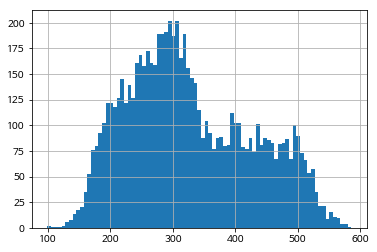

In [43]:
business["quantity"].hist(bins = 83)

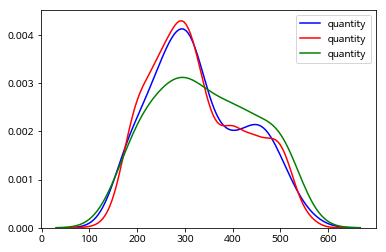

In [54]:
sns.kdeplot(business.query('contractType_1 == "E"')['quantity'], color='blue')
sns.kdeplot(business.query('contractType_1 == "M"')['quantity'], color='red')
sns.kdeplot(business.query('contractType_1 == "H"')['quantity'], color='green')

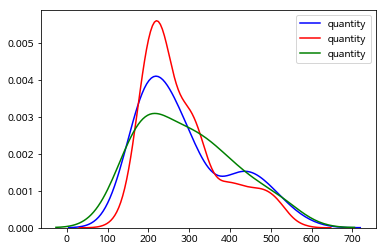

In [55]:
sns.kdeplot(termi_1_business.query('contractType_1 == "E"')['quantity'], color='blue')
sns.kdeplot(termi_1_business.query('contractType_1 == "M"')['quantity'], color='red')
sns.kdeplot(termi_1_business.query('contractType_1 == "H"')['quantity'], color='green')

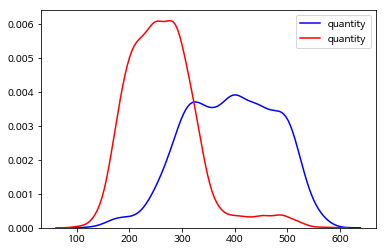

In [57]:
sns.kdeplot(business.query('contractType_2 == "I"')['quantity'], color='blue')
sns.kdeplot(business.query('contractType_2 == "M"')['quantity'], color='red')

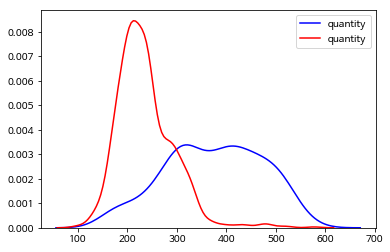

In [59]:
sns.kdeplot(termi_1_business.query('contractType_2 == "I"')['quantity'], color='blue')
sns.kdeplot(termi_1_business.query('contractType_2 == "M"')['quantity'], color='red')

In [ ]:
sns.kdeplot(business.query('contractType_2 == "I"')['quantity'], color='blue')
sns.kdeplot(business.query('contractType_2 == "M"')['quantity'], color='red')

In [ ]:
sns.kdeplot(termi_1_business.query('contractType_2 == "I"')['quantity'], color='blue')
sns.kdeplot(termi_1_business.query('contractType_2 == "M"')['quantity'], color='red')

In [46]:
business.columns

Index(['gender', 'customerType', 'age', 'marital', 'residence', 'channel',
       'credit', 'payment', 'paymentCO', 'quantity', 'province', 'provinceIS',
       'cityGrade', 'channelType', 'contractExtended', 'contractType',
       'contractType_1', 'contractType_2', 'cityGradeIS', 'Termination_str',
       'maxDay_str', 'maxGift_str', 'Termination_rate', 'gender_age',
       'overDue_str'],
      dtype='object')

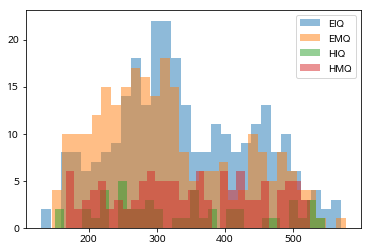

In [67]:
plt.hist(business[business["contractType"]=="EIQ"]['quantity'],label = "EIQ",alpha = 0.5, bins = 30)
plt.hist(business[business["contractType"]=="EMQ"]['quantity'],label = "EMQ",alpha = 0.5, bins = 30)
#lt.hist(business[business["contractType"]=="MIQ"]['quantity'],label = "MIQ",alpha = 0.5, bins = 30)
#lt.hist(business[business["contractType"]=="MMQ"]['quantity'],label = "MMQ",alpha = 0.5, bins = 30)
plt.hist(business[business["contractType"]=="HIQ"]['quantity'],label = "HIQ",alpha = 0.5, bins = 30)
plt.hist(business[business["contractType"]=="HMQ"]['quantity'],label = "HMQ",alpha = 0.5, bins = 30)
plt.legend()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


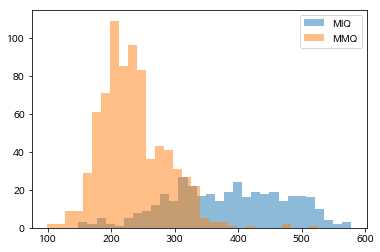

In [65]:
# plt.hist(business[business["contractType"]=="EIQ"]['quantity'],label = "EIQ",alpha = 0.5, bins = 30)
# plt.hist(business[business["contractType"]=="EMQ"]['quantity'],label = "EMQ",alpha = 0.5, bins = 30)
plt.hist(termi_1_business[business["contractType"]=="MIQ"]['quantity'],label = "MIQ",alpha = 0.5, bins = 30)
plt.hist(termi_1_business[business["contractType"]=="MMQ"]['quantity'],label = "MMQ",alpha = 0.5, bins = 30)
# plt.hist(business[business["contractType"]=="HIQ"]['quantity'],label = "HIQ",alpha = 0.5, bins = 30)
# plt.hist(business[business["contractType"]=="HMQ"]['quantity'],label = "HMQ",alpha = 0.5, bins = 30)
plt.legend()

In [ ]:
business["quantity"].hist(bins = 83,)

In [44]:
83*83

6889

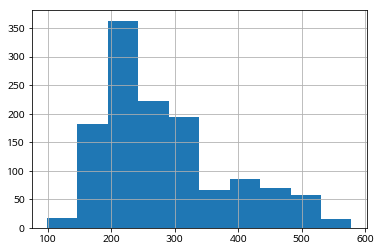

In [17]:
termi_1_business["quantity"].hist()

In [22]:
termi_1_business_q = termi_1_business[((termi_1_business['quantity'] < 250)&(termi_1_business['quantity'] > 110))]

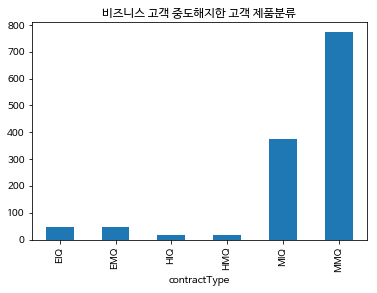

In [26]:
channel_f2f_age = termi_1_business["contractType"].value_counts()
channel_f2f_age.sort_index(inplace = True);
plt.xlabel('contractType')
plt.title('비즈니스 고객 중도해지한 고객 제품분류')
channel_f2f_age.plot.bar()

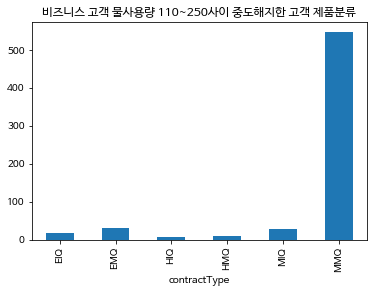

In [25]:
channel_f2f_age = termi_1_business_q["contractType"].value_counts()
channel_f2f_age.sort_index(inplace = True);
plt.xlabel('contractType')
plt.title('비즈니스 고객 물사용량 110~250사이 중도해지한 고객 제품분류')
channel_f2f_age.plot.bar()

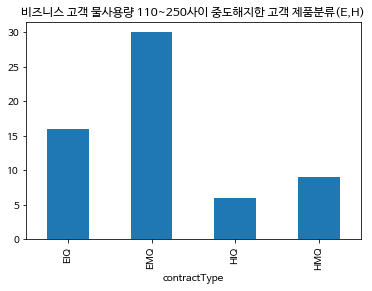

In [31]:
termi_1_business_q_EH = termi_1_business_q[((termi_1_business_q['contractType_1']=='E')|(termi_1_business_q['contractType_1']=='H'))]
term1BQEH = termi_1_business_q_EH["contractType"].value_counts()
term1BQEH .sort_index(inplace = True);
plt.xlabel('contractType')
plt.title('비즈니스 고객 물사용량 110~250사이 중도해지한 고객 제품분류(E,H)')
term1BQEH .plot.bar()

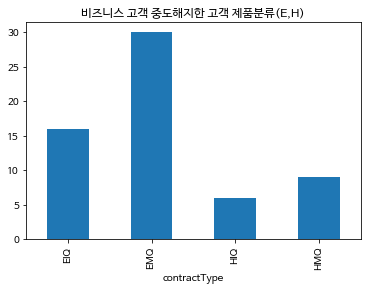

In [34]:
termi_1_business_EH = termi_1_business[((termi_1_business['contractType_1']=='E')|(termi_1_business['contractType_1']=='H'))]
term1BEH = termi_1_business["contractType"].value_counts()
term1BEH.sort_index(inplace = True);
plt.xlabel('contractType')
plt.title('비즈니스 고객 중도해지한 고객 제품분류(E,H)')
term1BQEH .plot.bar()

In [ ]:
channel_n2f = plan_new[((plan_new['channelType'] == '대형마트')|(plan_new['channelType'] == '양판점')|(plan_new['channelType'] == '쇼핑몰'))]

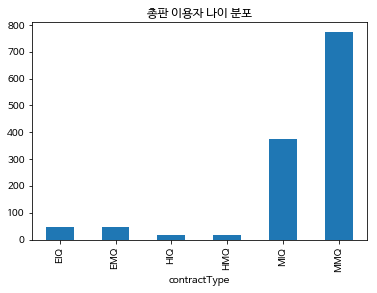

In [19]:
channel_f2f_age = termi_1_business["contractType"].value_counts()
channel_f2f_age.sort_index(inplace = True);
plt.xlabel('contractType')
plt.title('비즈니스 고객  중도해지한 고객 제품분류')
channel_f2f_age.plot.bar()

In [ ]:
termi_1_still = termi_1[termi_1['channelType'] == '연장']
termi_1_still

# 유통 채널 별 제품 선호도 및 연령대 조사 

In [12]:
channel_f2f = plan_new[plan_new['channelType'] == '총판']

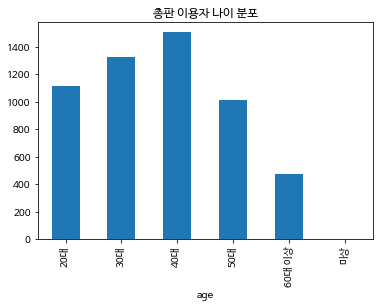

In [17]:
channel_f2f_age = channel_f2f["age"].value_counts()
channel_f2f_age.sort_index(inplace = True);
plt.xlabel('age')
plt.title('총판 이용자 나이 분포')
channel_f2f_age.plot.bar()

In [16]:
channel_n2f = plan_new[((plan_new['channelType'] == '대형마트')|(plan_new['channelType'] == '양판점')|(plan_new['channelType'] == '쇼핑몰'))]

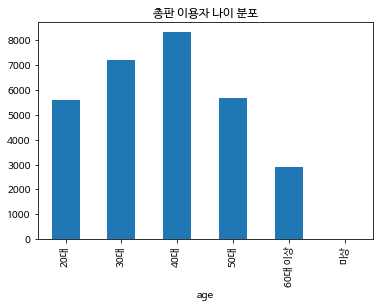

In [28]:
channel_n2f_age = channel_n2f["age"].value_counts()
channel_n2f_age.sort_index(inplace = True);
plt.xlabel('age')
plt.title('총판 이용자 나이 분포')
channel_n2f_age.plot.bar()

# 대면의 경우 나이대가 있는 고객이 많고 사양기준으로 정수기를 고름-프리미엄전략, 비대면(인터넷, 홈쇼핑 등)의 경우 젊은 고객이 많고 가격 및 사은품 등에 민감-보급형전략

In [44]:
df_crosstab = pd.concat([pd.crosstab(plan_new.age, plan_new.channelType, margins=True),
pd.crosstab(plan_new.age, plan_new.channelType).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new.age, plan_new.channelType).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,대형마트,쇼핑몰,양판점,연장,총판
age,,,,,,
20대,9402.0,1422.000,2298.000,1862.000,2706.000,1114.000
30대,11999.0,1813.000,2986.000,2389.000,3481.000,1330.000
40대,14076.0,2109.000,3411.000,2805.000,4242.000,1509.000
50대,9496.0,1418.000,2315.000,1941.000,2809.000,1013.000
60대 이상,4763.0,751.000,1200.000,955.000,1380.000,477.000
미상,18.0,1.000,5.000,2.000,7.000,3.000
All,49754.0,7514.000,12215.000,9954.000,14625.000,5446.000
20대,NaN,0.189,0.188,0.187,0.185,0.205
30대,NaN,0.241,0.244,0.240,0.238,0.244


In [54]:
plan_new_H = plan_new[plan_new['contractType_1'] == 'H']

In [55]:
df_crosstab = pd.concat([pd.crosstab(plan_new_H .age, plan_new_H .channelType, margins=True),
pd.crosstab(plan_new_H .age, plan_new_H .channelType).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new_H .age, plan_new_H .channelType).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,대형마트,쇼핑몰,양판점,연장,총판
age,,,,,,
20대,1150.0,159.000,249.000,210.000,286.000,246.000
30대,4204.0,653.000,1045.000,836.000,1189.000,481.000
40대,2056.0,296.000,502.000,403.000,611.000,244.000
50대,1344.0,187.000,315.000,261.000,399.000,182.000
60대 이상,533.0,90.000,143.000,104.000,151.000,45.000
미상,3.0,0.000,2.000,0.000,1.000,0.000
All,9290.0,1385.000,2256.000,1814.000,2637.000,1198.000
20대,NaN,0.115,0.110,0.116,0.108,0.205
30대,NaN,0.471,0.463,0.461,0.451,0.402


# 우리데이터로는 전혀 상관이 없음...

# 나이 별 성별 조사

In [14]:
df_crosstab = pd.concat([pd.crosstab(plan_new.age, plan_new.gender, margins=True),
pd.crosstab(plan_new.age, plan_new.gender).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new.age, plan_new.gender).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,FEMALE,MALE,UNKOWN
age,,,,
20대,9402.0,6586.000,2813.000,3.000
30대,11999.0,8369.000,3626.000,4.000
40대,14076.0,9808.000,4257.000,11.000
50대,9496.0,6658.000,2831.000,7.000
60대 이상,4763.0,3325.000,1436.000,2.000
미상,18.0,13.000,5.000,0.000
All,49754.0,34759.000,14968.000,27.000
20대,NaN,0.189,0.188,0.111
30대,NaN,0.241,0.242,0.148


# 나이별 젠더비율은 여성 7, 남성 3으로 모두 동일

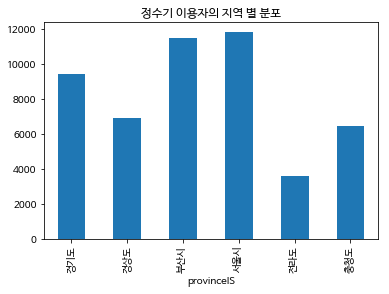

In [10]:
plan_new_provinceIS = plan_new["provinceIS"].value_counts()
plan_new_provinceIS.sort_index(inplace = True);
plt.xlabel('provinceIS')
plt.title('정수기 이용자의 지역 별 분포')
plan_new_provinceIS.plot.bar()

In [9]:
df_crosstab = pd.concat([pd.crosstab(plan_new.cityGrade, plan_new.provinceIS, margins=True),
pd.crosstab(plan_new.cityGrade, plan_new.provinceIS).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new.cityGrade, plan_new.provinceIS).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,경기도,경상도,부산시,서울시,전라도,충청도
cityGrade,,,,,,,
1급지,17332.0,0.000,0.000,7042.000,6853.000,0.000,3437.000
2급지,12317.0,4960.000,2432.000,2443.000,2482.000,0.000,0.000
3급지,7462.0,4485.000,1486.000,0.000,1491.000,0.000,0.000
4급지,5164.0,0.000,0.000,1016.000,992.000,2169.000,987.000
5급지,5004.0,0.000,3012.000,982.000,0.000,0.000,1010.000
6급지,2475.0,0.000,0.000,0.000,0.000,1462.000,1013.000
All,49754.0,9445.000,6930.000,11483.000,11818.000,3631.000,6447.000
1급지,NaN,0.000,0.000,0.613,0.580,0.000,0.533
2급지,NaN,0.525,0.351,0.213,0.210,0.000,0.000


# 개인사업자 -> 1년 선납(personal, office)  / 법인 -> 선납 선택 

In [ ]:
거주지 별

In [7]:
plan_new

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail,contractType,contractType_1,contractType_2,cityGrade,channelType
0,1.0,658673.0,FEMALE,PERSONAL,50대,SINGLE,MMQ-56583,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,3.0,0.0,1.0,0.0,경기도,화성시,경상도,포항시 남구,카드,MMQ,M,M,2급지,연장
1,2.0,729911.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-67155,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,5.0,0.0,0.0,0.0,서울시,강남구,충청도,청주시,은행,EIQ,E,I,1급지,연장
2,3.0,778222.0,FEMALE,PERSONAL,30대,MARRIED,HIQ-70900,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,1.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,은행,HIQ,H,I,1급지,총판
3,4.0,948864.0,MALE,PERSONAL,20대,MARRIED,MIQ-76248,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,5.0,0.0,0.0,0.0,서울시,강남구,서울시,강남구,은행,MIQ,M,I,1급지,양판점
4,5.0,656563.0,MALE,PERSONAL,30대,SINGLE,MMQ-42016,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,3.0,0.0,0.0,0.0,서울시,강동구,서울시,강동구,은행,MMQ,M,M,2급지,양판점
5,6.0,952126.0,FEMALE,PERSONAL,40대,MARRIED,HMQ-39892,APART,서비스 방문,LOW,CMS,국민은행,79.7,6.0,0.0,1.0,0.0,서울시,강동구,경상도,포항시 남구,은행,HMQ,H,M,2급지,연장
6,7.0,791262.0,MALE,PERSONAL,20대,MARRIED,MIQ-54943,OFFICETEL,홈쇼핑/방송,HIGH,CARD,국민카드,71.1,3.0,0.0,0.0,0.0,부산시,해운대구,서울시,양천구,카드,MIQ,M,I,1급지,쇼핑몰
7,8.0,703615.0,MALE,PERSONAL,50대,MARRIED,MIQ-73987,OFFICETEL,홈쇼핑/방송,MIDDLE,CMS,기업은행,77.4,6.0,0.0,1.0,0.0,경상도,거제시,부산시,진구,은행,MIQ,M,I,5급지,쇼핑몰
8,9.0,704263.0,MALE,BUSINESS,60대 이상,SINGLE,MIQ-36963,OFFICETEL,홈쇼핑/인터넷,MIDDLE,CMS,기업은행,473.9,1.0,0.0,0.0,0.0,부산시,해운대구,충청도,청주시,은행,MIQ,M,I,1급지,쇼핑몰
9,10.0,784541.0,MALE,PERSONAL,30대,MARRIED,MIQ-42984,APART,이마트,MIDDLE,CARD,현대카드,117.2,0.0,0.0,0.0,0.0,부산시,연제구,전라도,광양시,카드,MIQ,M,I,4급지,대형마트


In [31]:
plan_new_20 = plan_new[plan_new['age'] == '20대']

In [32]:
plan_new_30 = plan_new[plan_new['age'] == '30대']

In [33]:
plan_new_40 = plan_new[plan_new['age'] == '40대']

In [34]:
plan_new_50 = plan_new[plan_new['age'] == '50대']

In [43]:
plan_new_60 = plan_new[plan_new['age'] == '60대 이상']

In [38]:
df_crosstab = pd.concat([pd.crosstab(plan_new_20.contractType_1, plan_new_20.age, margins=True),
pd.crosstab(plan_new_20.contractType_1, plan_new_20.age).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new_20.contractType_1, plan_new_20.age).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,20대,All
contractType_1,,
E,4152.000,4152.0
H,1149.000,1149.0
M,4087.000,4087.0
All,9388.000,9388.0
E,0.442,NaN
H,0.122,NaN
M,0.435,NaN
E,1.000,NaN
H,1.000,NaN


In [39]:
df_crosstab = pd.concat([pd.crosstab(plan_new_30.contractType_1, plan_new_30.age, margins=True),
pd.crosstab(plan_new_30.contractType_1, plan_new_30.age).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new_30.contractType_1, plan_new_30.age).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,30대,All
contractType_1,,
E,2651.000,2651.0
H,4196.000,4196.0
M,5125.000,5125.0
All,11972.000,11972.0
E,0.221,NaN
H,0.350,NaN
M,0.428,NaN
E,1.000,NaN
H,1.000,NaN


In [40]:
df_crosstab = pd.concat([pd.crosstab(plan_new_40.contractType_1, plan_new_40.age, margins=True),
pd.crosstab(plan_new_40.contractType_1, plan_new_40.age).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new_40.contractType_1, plan_new_40.age).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,40대,All
contractType_1,,
E,2478.000,2478.0
H,2054.000,2054.0
M,9521.000,9521.0
All,14053.000,14053.0
E,0.176,NaN
H,0.146,NaN
M,0.678,NaN
E,1.000,NaN
H,1.000,NaN


In [92]:
df_crosstab = pd.concat([pd.crosstab(plan_new.contractType_1, plan_new.cityGradeIS, margins=True),
pd.crosstab(plan_new.contractType_1, plan_new.cityGradeIS).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new.contractType_1, plan_new.cityGradeIS).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,1급지,2급지,3급지,4급지,5급지,6급지,All
contractType_1,,,,,,,
E,4341.000,4473.000,1884.000,804.000,849.000,435.000,12786.0
H,4201.000,1887.000,1865.000,670.000,439.000,213.000,9275.0
M,8754.000,5929.000,3696.000,3677.000,3704.000,1824.000,27584.0
All,17296.000,12289.000,7445.000,5151.000,4992.000,2472.000,49645.0
E,0.251,0.364,0.253,0.156,0.170,0.176,NaN
H,0.243,0.154,0.251,0.130,0.088,0.086,NaN
M,0.506,0.482,0.496,0.714,0.742,0.738,NaN
E,0.340,0.350,0.147,0.063,0.066,0.034,NaN
H,0.453,0.203,0.201,0.072,0.047,0.023,NaN


In [46]:
df_crosstab = pd.concat([pd.crosstab( plan_new_60.age, plan_new_60.contractType_1,margins=True),
pd.crosstab(plan_new_60.age,plan_new_60.contractType_1).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new_60.age,plan_new_60.contractType_1).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,E,H,M
age,,,,
60대 이상,4756.0,1046.00,533.000,3177.000
All,4756.0,1046.00,533.000,3177.000
60대 이상,NaN,1.00,1.000,1.000
60대 이상,NaN,0.22,0.112,0.668


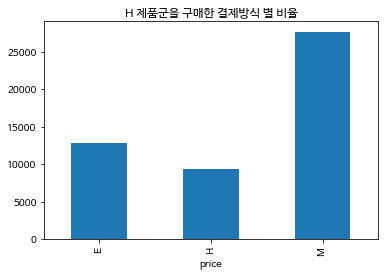

In [54]:
contract_H_P = plan_be["contractType_1"].value_counts()
contract_H_P.sort_index(inplace = True);
plt.xlabel('price')
plt.title('H 제품군을 구매한 결제방식 별 비율')
contract_H_P.plot.bar()

In [57]:
(12796/(12796+27668+9290))*100 E

25.7185351931503

In [58]:
(27668/(12796+27668+9290))*100 M

55.609599228202754

In [59]:
(9290/(12796+27668+9290))*100 H

18.671865578646944

In [60]:
(12796+27668+9290)/3

16584.666666666668

In [61]:
16584/12796

1.2960300093779307

In [62]:
16584/27668

0.5993928003469712

In [63]:
16584/9290

1.7851453175457481

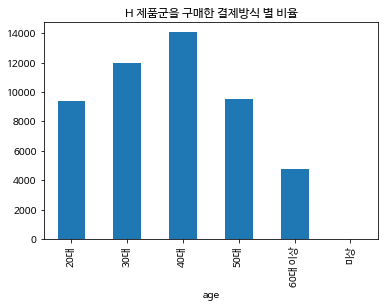

In [94]:
contract_H_P = plan_be["age"].value_counts()
contract_H_P.sort_index(inplace = True);
plt.xlabel('age')
plt.title('H 제품군을 구매한 결제방식 별 비율')
contract_H_P.plot.bar()

In [97]:
plan_new.describe()

,gender,customerType,age,marital,residence,channel,credit,payment,paymentCO,province,provinceIS,cityGrade,channelType,contractExtended,contractType,contractType_1,contractType_2,cityGradeIS,Termination_str,maxDay_str,maxGift_str,Termination_rate,overDue_str
count,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645,49645
unique,2,2,5,2,4,12,3,2,11,6,6,6,5,2,6,3,2,6,2,7,2,4,5
top,FEMALE,PERSONAL,40대,MARRIED,APART,렌탈재계약,MIDDLE,CMS,국민은행,서울시,서울시,1급지,연장,신규,MIQ,M,M,1급지,중도 해약 X,토요일,지급 O,B,0일
freq,34710,42334,14053,31390,21005,7447,29836,29735,9042,11847,11789,17296,14595,35050,14426,27584,24976,17296,47566,13010,36859,33378,48467


In [93]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  df_crosstab = pd.concat([pd.crosstab(plan_new.residence, plan_new.cityGradeIS, margins=True),
pd.crosstab(plan_new.residence, plan_new.cityGradeIS).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(plan_new.residence, plan_new.cityGradeIS).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)                                                                                                                                                           

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,1급지,2급지,3급지,4급지,5급지,6급지,All
residence,,,,,,,
APART,6477.000,5435.000,2886.000,2559.000,2501.000,1147.000,21005.0
ETC.,864.000,628.000,356.000,271.000,253.000,130.000,2502.0
HOUSE,4771.000,2960.000,2604.000,1358.000,1086.000,617.000,13396.0
OFFICETEL,5184.000,3266.000,1599.000,963.000,1152.000,578.000,12742.0
All,17296.000,12289.000,7445.000,5151.000,4992.000,2472.000,49645.0
APART,0.374,0.442,0.388,0.497,0.501,0.464,NaN
ETC.,0.050,0.051,0.048,0.053,0.051,0.053,NaN
HOUSE,0.276,0.241,0.350,0.264,0.218,0.250,NaN
OFFICETEL,0.300,0.266,0.215,0.187,0.231,0.234,NaN


# 비즈니스 4급지 HIQ

In [ ]:
channel_n2f = plan_new[((plan_new['channelType'] == '대형마트')|(plan_new['channelType'] == '양판점')|(plan_new['channelType'] == '쇼핑몰'))]

In [5]:
plan_b4h = plan_new[((plan_new['customerType'] == 'BUSINESS')|(plan_new['cityGrade'] == '4급지')|(plan_new['contractType'] == 'HIQ'))]

In [7]:
plan_b4h

,gender,customerType,age,marital,residence,channel,credit,payment,paymentCO,province,provinceIS,cityGrade,channelType,contractExtended,contractType,contractType_1,contractType_2,cityGradeIS,Termination_str,maxDay_str,maxGift_str,Termination_rate,overDue_str
2,FEMALE,PERSONAL,30대,MARRIED,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,충청도,서울시,1급지,총판,신규,HIQ,H,I,1급지,중도 해약 X,화요일,지급 O,B,0일
8,MALE,BUSINESS,60대 이상,SINGLE,OFFICETEL,홈쇼핑/인터넷,MIDDLE,CMS,기업은행,부산시,충청도,1급지,쇼핑몰,신규,MIQ,M,I,1급지,중도 해약 X,화요일,지급 O,B,0일
9,MALE,PERSONAL,30대,MARRIED,APART,이마트,MIDDLE,CARD,현대카드,부산시,전라도,4급지,대형마트,신규,MIQ,M,I,4급지,중도 해약 X,월요일,지급 O,B,0일
10,MALE,PERSONAL,50대,MARRIED,APART,서비스 방문,MIDDLE,CARD,외환카드,전라도,전라도,4급지,연장,연장,MIQ,M,I,4급지,중도 해약 X,월요일,지급 O,A,0일
21,FEMALE,PERSONAL,50대,SINGLE,APART,전자랜드,HIGH,CARD,삼성카드,전라도,전라도,4급지,양판점,신규,MMQ,M,M,4급지,중도 해약 X,일요일,지급 X,B,0일
24,FEMALE,PERSONAL,30대,SINGLE,OFFICETEL,이마트,MIDDLE,CARD,현대카드,부산시,충청도,1급지,대형마트,신규,HIQ,H,I,1급지,중도 해약 X,목요일,지급 O,B,0일
25,MALE,BUSINESS,50대,SINGLE,APART,하이마트,MIDDLE,CARD,국민카드,부산시,충청도,1급지,양판점,신규,MIQ,M,I,1급지,중도 해약 X,수요일,지급 X,B,0일
28,MALE,PERSONAL,30대,MARRIED,ETC.,서비스 방문,MIDDLE,CMS,SC제일은행,충청도,서울시,1급지,연장,연장,HIQ,H,I,1급지,중도 해약 X,일요일,지급 O,A,0일
35,MALE,PERSONAL,30대,MARRIED,APART,렌탈재계약,MIDDLE,CARD,롯데카드,서울시,서울시,1급지,연장,연장,HIQ,H,I,1급지,중도 해약 X,토요일,지급 X,A,0일
45,FEMALE,BUSINESS,30대,MARRIED,APART,홈플러스,MIDDLE,CARD,삼성카드,경상도,서울시,3급지,대형마트,신규,MIQ,M,I,3급지,중도 해약 X,화요일,지급 O,B,0일
